In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.text as mtext
import matplotlib as mpl


import homeomorphism_helpers as hh

from papercolors import colordict as pcd


mpl.rcParams['figure.dpi']=300

paper_path = Path('../figures/')

fsold={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}
fs = {k:v+1 for k, v in fsold.items()}

In [3]:
data = hh.get_data("nydata_2022.parquet")
df = data['df']

In [4]:
def make_q(fig=None):
    
    if fig == None:
        fig = plt.figure(figsize=(3.5, 2), layout='compressed')
    
    mosaic = [['pab','.', 'mab'], ['pa', '.', 'ma'], ['pac', '.', 'mac']]
    axd = fig.subplot_mosaic(mosaic)

    axd['pac'].text(.5, 0, r"visual $V$", color=pcd['total'], ha='center', va='top')
    axd['mac'].text(.5, 0, r"graphic $H$", color=pcd['total'], ha='center', va='top')
    for axn in axd:
        #if axn not in ['mac', 'mab']:
        axd[axn].set(xlim=(0,1), ylim=(0, 1), aspect='equal')
        
        axd[axn].set(xticks=[], yticks=[])   
        axd[axn].axis('off')
    
    markersize=100
    #nygeo[nygeo['NAME']=='JFK INTL AP'].plot(marker ='s',edgecolor=jfk_color, facecolor='none', ax=axd['mab'], markersize=60, lw=2)
    #mp = nyshp.plot(ax=axd['mab'],  facecolor='none', edgecolor=(map_color, .2), lw=.25)
    #axd['mab'].margins(.2)
    
    axd['mab'].scatter(.5, .5, marker ='s',edgecolor=hh.airports['jfk_color'], facecolor='none', s=markersize, lw=2)
    axd['mac'].scatter(.5, .5, marker ='o',edgecolor=hh.airports['jfk_color'], facecolor='none', s=markersize, lw=2)              
    #nygeo[nygeo['NAME']=='JFK INTL AP'].plot(marker ='o',edgecolor=jfk_color, facecolor='none', ax=axd['mac'], markersize=60, lw=2)
    #mp = nyshp.plot(ax=axd['mac'],  facecolor='none', edgecolor=(map_color, .2), lw=.25)
    #axd['mac'].margins(.2)
    
    
    
    # visual
    p1 = axd['pab'].text(.5, .5, f"{hh.airports['jfk_color']}, 's' ",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    pa1 = axd['pab'].annotate(r"$color \times markerstyle: P_{b}$",(.5, 1), xycoords=p1, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    p2 = axd['pa'].text(.5, .5, f"{hh.airports['jfk_color']}",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    pa2 = axd['pa'].annotate(r"$color: P_{a}$",(.5, 1), xycoords=p2, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    p3 = axd['pac'].text(.5, .5, f"{hh.airports['jfk_color']}, 'o' ",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    pa3 = axd['pac'].annotate(r"$color \times markerstyle: P_{b}$",(.5, 1), xycoords=p3, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    
    
    
    
    measure = axd['ma'].text(.5, .5, f"color: {mcolors.to_hex(hh.airports['jfk_color'])}", 
                             color=hh.airports['jfk_color'], fontsize=fs['tiny'], ha='center', va='center')
    
    
    arrowprops_art=dict(arrowstyle="->", color=pcd['artist'], lw=.75, mutation_scale=5)
    for i, (start, stop, label, ls, c) in enumerate([(p1, axd['mab'], r"$Q_{square}$", '-', pcd['artist']), 
                                                     (p2, measure, r"$\simeq$", ':', 'k'), 
                                                     (p3, axd['mac'], r"$Q_{circle}$", '-', pcd['artist'])]):
        arrowprops_art['linestyle'] = ls
        arrowprops_art['color'] = c
        nu = mtext.Annotation("", xytext=(1, .5), xy=(0, .5), textcoords=start, xycoords=stop, arrowprops=arrowprops_art)
        fig.add_artist(nu)
        nu_lab = mtext.Annotation(label, xy=(.45, .75), xycoords=nu, color=c, fontsize=fs['tiny'] + (0 if label.startswith('$Q') else 1), ha='center', va='bottom')
        fig.add_artist(nu_lab)
    
    arrowprops_art=dict(arrowstyle="->", color=pcd['fiber'], lw=.75, mutation_scale=5)
    for (start, y1, stop, y2, label) in [(p1, 0, pa2, .5, r"$\pi_{P_{a}}$"), (pa3, .5, p2, 0, r"$\pi_{P_{a}}$")]:
        nu = mtext.Annotation("", xytext=(.5, y1), xy=(.5, y2), textcoords=start, xycoords=stop, arrowprops=arrowprops_art)
        fig.add_artist(nu)
        nu_lab = mtext.Annotation(label, xy=(.3, .5), xycoords=nu, color=pcd['fiber'], fontsize=fs['tiny'], ha='right', va='center')
        fig.add_artist(nu_lab)
    
    
    
    arrowprops_art=dict(arrowstyle="->", color=pcd['monoid'], lw=.75, mutation_scale=5)
    for (start, y1, stop, y2, label) in [(axd['mab'], .2, measure , 1, r"$M|_{P_a}\circ\delta_{P_a, square}$"), 
                                         (axd['mac'], .8, measure, 0, r"$M|_{P_a}\circ\delta_{P_a, circle}$")]:
        nu = mtext.Annotation("", xytext=(.5, y1), xy=(.5, y2), textcoords=start, xycoords=stop, arrowprops=arrowprops_art)
        fig.add_artist(nu)
        nu_lab = mtext.Annotation(label, xy=(.6, .5), xycoords=nu, color=pcd['monoid'], fontsize=fs['tiny'], ha='left', va='center')
        fig.add_artist(nu_lab)

In [43]:
def make_nu(fig=None):
    if fig == None:
        fig = plt.figure(figsize=(3.5, 2), layout='compressed')

    mosaic = [['fab', 'pab', 'mab'], ['fa', 'pa', 'ma'], ['fac', 'pac', 'mac']]
    axd = fig.subplot_mosaic(mosaic, height_ratios=[1.5, 1, 1.5])
    
    axd['fac'].text(.5, 0, r"data $E$", color=pcd['total'], ha='center', va='top')
    axd['pac'].text(.5, 0, r"visual $V$", color=pcd['total'], ha='center', va='top')

    jfk = df[(df['DATE']==hh.airports['point_date']) & (df['LATITUDE'] == hh.airports['jfk_lat']) & (df['LONGITUDE'] == hh.airports['jfk_lon'])]
    jfk_color= hh.airports['jfk_color']
    
    for axn in axd:
    
        axd[axn].set(xlim=(0,1), ylim=(0, 1), aspect='equal')
        
        axd[axn].set(xticks=[], yticks=[])   
        axd[axn].axis('off')
    
    
    # data
    t1 = axd['fab'].text(.5, .5, f"{jfk['NAME'].values[0]}, PRCP",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    ta1 = axd['fab'].annotate(r"$name \times element: F_{b}$",(.5, 1), xycoords=t1, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    t2 = axd['fa'].text(.5, .5, f"{jfk['NAME'].values[0]}",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    ta2 = axd['fa'].annotate(r"$name: F_{a}$",(.5, 1), xycoords=t2, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    t3 = axd['fac'].text(.5, .5, f"{jfk['NAME'].values[0]}, TEMP",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    ta3 = axd['fac'].annotate(r"$name \times element: F_{b}$",(.5, 1), xycoords=t3, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    
    # visual
    p1 = axd['pab'].text(.6, .5, f"{jfk_color}, 's' ",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    pa1 = axd['pab'].annotate(r"$color \times markerstyle: P_{b}$",(.5, 1), xycoords=p1, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    p2 = axd['pa'].text(.6, .5, f"{jfk_color}",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    pa2 = axd['pa'].annotate(r"$color: P_{a}$",(.5, 1), xycoords=p2, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    p3 = axd['pac'].text(.6, .5, f"{jfk_color}, 'o' ",color=pcd['section'], fontsize=fs['tiny'], ha='center', va='center')
    pa3 = axd['pac'].annotate(r"$color \times markerstyle: P_{b}$",(.5, 1), xycoords=p3, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'])
    
    
    arrowprops_art=dict(arrowstyle="->", color=pcd['artist'], lw=.75, mutation_scale=5)
    for i, (start, stop, label, ls) in enumerate([(t1, p1, r"$\nu_{color, height}$", '-'), (t2,p2, r"$\nu_{color}$", '--'), (t3, p3, r"$\nu_{color, x, y}$", '-')]):
        arrowprops_art['linestyle'] = ls
        nu = mtext.Annotation("", xytext=(1, .5), xy=(0, .5), textcoords=start, xycoords=stop, arrowprops=arrowprops_art)
        fig.add_artist(nu)
        nu_lab = mtext.Annotation(label, xy=(.5, -.2), xycoords=nu, color=pcd['artist'], fontsize=fs['tiny'], ha='center', va='top')
        fig.add_artist(nu_lab)
        
    hexcolor =  mcolors.to_hex(jfk_color)
    
    m1 = axd['mab'].text(.5, .5, f"color:{hexcolor}, mark: 's'",  color=pcd['monoid'], fontsize=fs['tiny'], ha='center', va='center')
    m2 = axd['ma'].text(.5, .5, f" color: {hexcolor}", color=jfk_color, fontsize=fs['tiny'], ha='center', va='center')
    m3 = axd['mac'].text(.5, .5, f"color:{hexcolor}, mark:'o'", color=pcd['monoid'], fontsize=fs['tiny'], ha='center', va='center')
    
    # eta1
    arrowprops_art.update({'color':pcd['monoid']})
    arrowprops_art.update({'connectionstyle':'arc3, rad=-.15'})
    nu = mtext.Annotation("", xytext=(.5, 1), xy=(.5, 1), textcoords=ta1, xycoords=m1, arrowprops=arrowprops_art)
    fig.add_artist(nu)
    nu_lab = mtext.Annotation(r"$\eta_{color, scatter}$", xy=(.5, .5), xycoords=nu, color=pcd['monoid'], fontsize=fs['tiny'], ha='center', va='bottom')
    fig.add_artist(nu_lab)
    arrowprops_art.update({'connectionstyle':'arc3, rad=.1'})
    nu = mtext.Annotation("", xytext=(.5, 0), xy=(.5,0), textcoords=t3, xycoords=m3, arrowprops=arrowprops_art)
    fig.add_artist(nu)
    nu_lab = mtext.Annotation(r"$\eta_{color, scatter}$", xy=(.5, .15), xycoords=nu, color=pcd['monoid'], fontsize=fs['tiny'], ha='center', va='bottom')
    fig.add_artist(nu_lab)
        
    arrowprops_art=dict(arrowstyle="->", color=pcd['fiber'], lw=.75, mutation_scale=5)
    for (start, y1, stop, y2, label) in [(t1, 0, ta2, .5, r"$\pi_{F_{a}}$"), (ta3, .5, t2, 0, r"$\pi_{F_{a}}$")]:
        nu = mtext.Annotation("", xytext=(.5, y1), xy=(.5, y2), textcoords=start, xycoords=stop, arrowprops=arrowprops_art)
        fig.add_artist(nu)
        nu_lab = mtext.Annotation(label, xy=(.3, .5), xycoords=nu, color=pcd['fiber'], fontsize=fs['tiny'], ha='right', va='center')
        fig.add_artist(nu_lab)
    
    for (start, y1, stop, y2, label) in [(p1, 0, pa2, .5, r"$\pi_{P_{a}}$"), (pa3, .5, p2, 0, r"$\pi_{P_{a}}$")]:
        nu = mtext.Annotation("", xytext=(.5, y1), xy=(.5, y2), textcoords=start, xycoords=stop, arrowprops=arrowprops_art)
        fig.add_artist(nu)
        nu_lab = mtext.Annotation(label, xy=(.3, .5), xycoords=nu, color=pcd['fiber'], fontsize=fs['tiny'], ha='right', va='center')
        fig.add_artist(nu_lab)
    
    arrowprops_art=dict(arrowstyle="->", color=pcd['monoid'], lw=.75, mutation_scale=5)
    for (start, y1, stop, y2, label) in [(m1, 0, m2 , 1, r"$M|_{color}$"), (m3, 1, m2, 0, r"$M|_{color}$")]:
        nu = mtext.Annotation("", xytext=(.5, y1), xy=(.5, y2), textcoords=start, xycoords=stop, arrowprops=arrowprops_art)
        fig.add_artist(nu)
        nu_lab = mtext.Annotation(label, xy=(.4, .5), xycoords=nu, color=pcd['monoid'], fontsize=fs['tiny'], ha='right', va='center')
        fig.add_artist(nu_lab)
    
    arrowprops_art=dict(arrowstyle="->", color='k', linestyle=':', lw=.75, mutation_scale=5)
    nu = mtext.Annotation("", xytext=(1, .5), xy=(0, .5), textcoords=p2, xycoords=m2, arrowprops=arrowprops_art)
    fig.add_artist(nu)
    nu_lab = mtext.Annotation(r"$\simeq$", xy=(.6, 1), xycoords=nu, color='k', fontsize=fs['tiny']+1, ha='right', va='bottom')
    fig.add_artist(nu_lab)

Text(0.5, 0.98, 'composition $Q$')

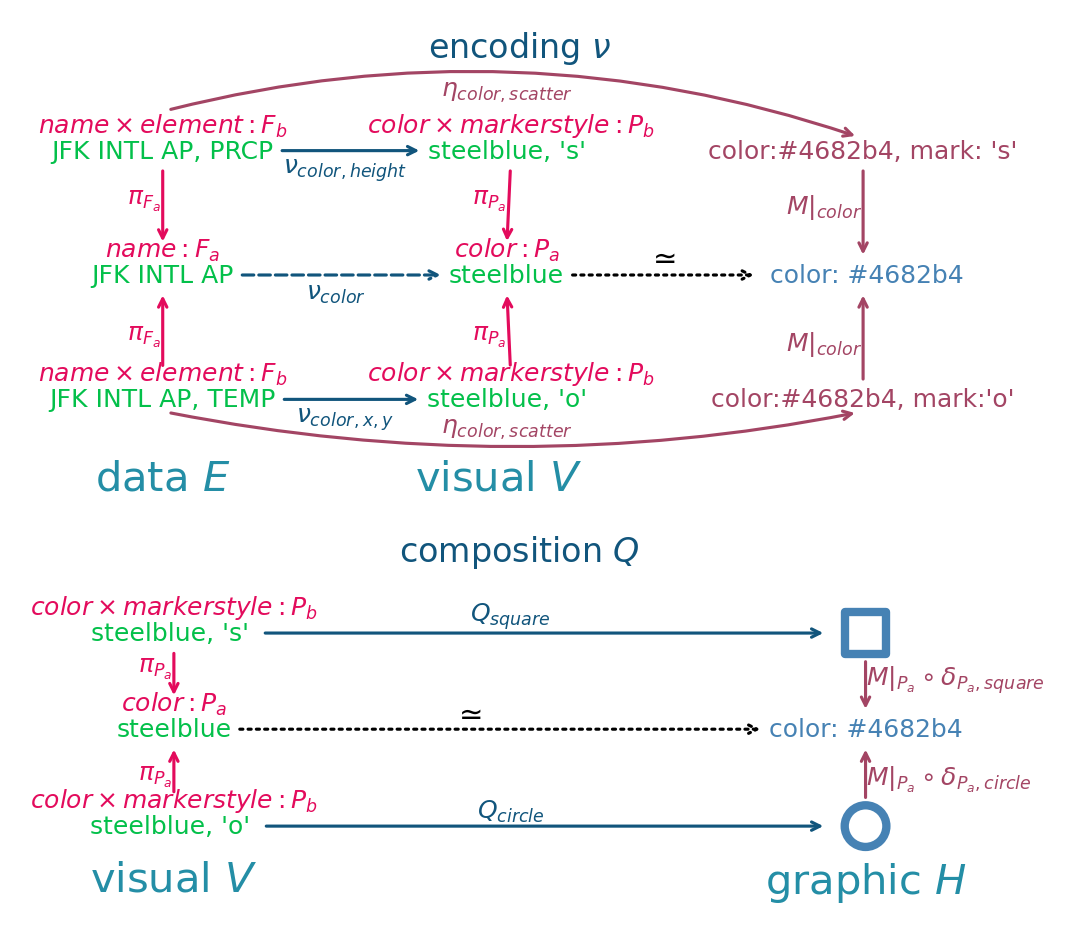

In [44]:
fig = plt.figure(figsize=(3.5, 3), layout='compressed')
fig1, fig2 = fig.subfigures(nrows=2, height_ratios=[1.25, 1])
make_nu(fig1)
make_q(fig2)
fig1.suptitle(r"encoding $\nu$", fontsize=fs['script'], color=pcd['artist'])
fig2.suptitle(r"composition $Q$", fontsize=fs['script'], color=pcd['artist'])
#fig.savefig(paper_path/"nu_qu.pdf", dpi=300, bbox_inches='tight')

In [45]:
paper_path

WindowsPath('../figures')

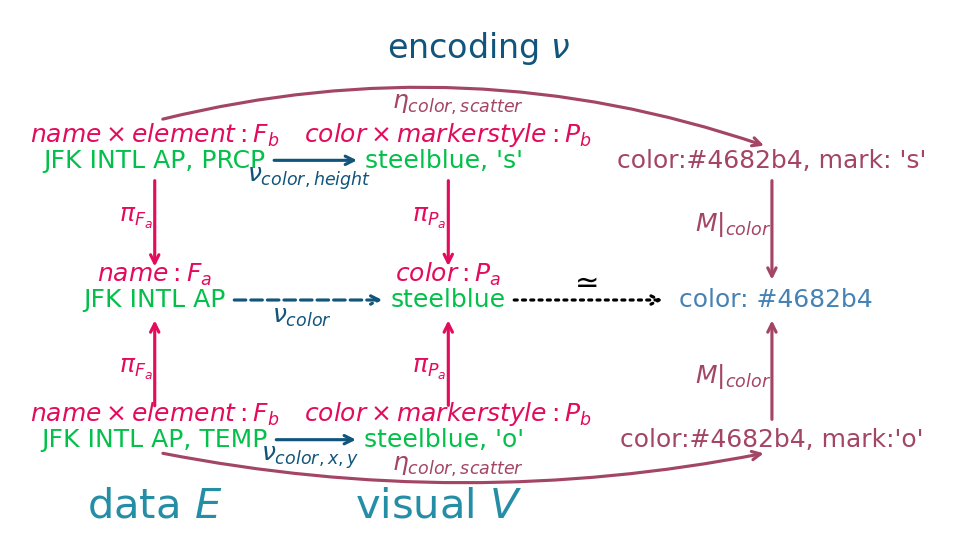

In [42]:
fig = plt.figure(figsize=(3.5, 2), layout='compressed')
make_nu(fig)
#make_q(fig2)
fig.suptitle(r"encoding $\nu$", fontsize=fs['script'], color=pcd['artist'])
#fig2.suptitle(r"composition $Q$", fontsize=fs['script'], color=pcd['artist'])
fig.savefig(paper_path/"encoder.pdf", dpi=300, bbox_inches='tight')


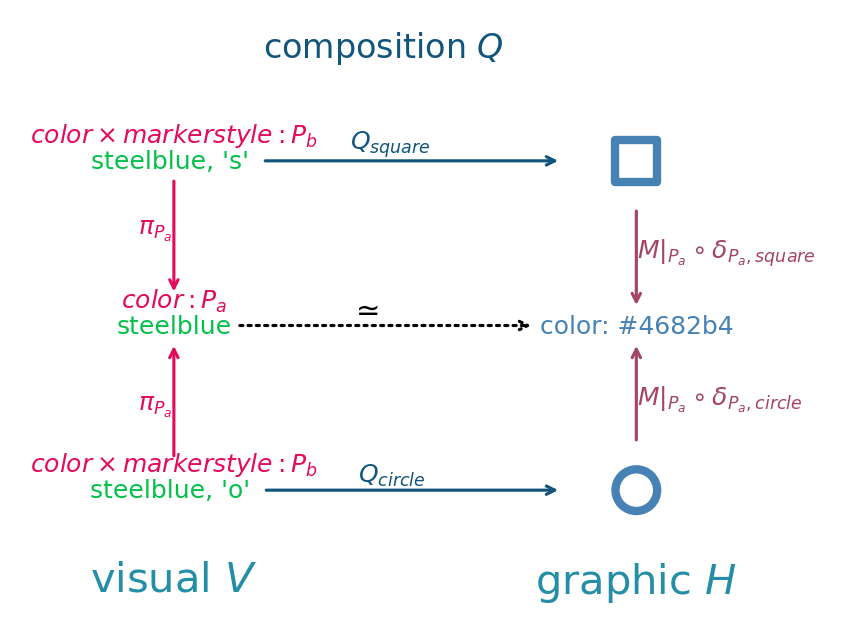

In [11]:
fig = plt.figure(figsize=(3.5, 2), layout='compressed')
#make_nu(fig)
make_q(fig)
#fig.suptitle(r"encoding $\nu$", fontsize=fs['script'], color=pcd['artist'])
fig.suptitle(r"composition $Q$", fontsize=fs['script'], color=pcd['artist'])
fig.savefig(paper_path/"compositor.pdf", dpi=300, bbox_inches='tight')